The implementations are based on **An overview of gradient descent optimization algorithms** by Sebastian Ruder (2017), https://arxiv.org/pdf/1609.04747.pdf

In [1]:
from eda_imports import *
from models import QuadraticModel

In [2]:
def true_func_wraper(x1, x2, w, sample=False):
    return w[0] * x1 ** 2 + w[1] * x2 ** 2

In [3]:
def true_func(xs, ws, sample=False):
    res = np.dot(xs ** 2, ws)
    if sample:
        res = res + np.random.normal(loc=0, scale=10, size=res.shape)
    return res

In [4]:
def plot_3d(x, y, z, style='scatter', ax=None):
    if ax is None:
        fig = plt.figure(figsize=(8, 6))
        ax = fig.gca(projection='3d')
    
    if style == 'surface':
        ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=mpl.cm.coolwarm,
                        linewidth=0, antialiased=False)
    elif style == 'scatter':
        ax.scatter(x, y, z, edgecolor='none', marker='.')
    else:
        raise NotImplementedError
        
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    return ax

In [5]:
ref_w = [10, 4]

ref_xs = np.array([np.arange(-1, 1, 0.1), np.arange(-1, 1, 0.1)]).T
ref_ys = true_func(ref_xs, ref_w)

In [6]:
ref_xs.shape

(20, 2)

In [7]:
X1, X2 = np.meshgrid(ref_xs[:,0], ref_xs[:,1])

In [8]:
Y = true_func_wraper(X1, X2, ref_w)

# sample some data points and learn a model

In [9]:
xs_samp = np.random.randint(-1000, 1000, size=(1000, 2)) / 1000
x1s_samp = xs_samp[:,0]
x2s_samp = xs_samp[:,1]

In [10]:
ys_samp = true_func_wraper(x1s_samp, x2s_samp, ref_w, sample=True)

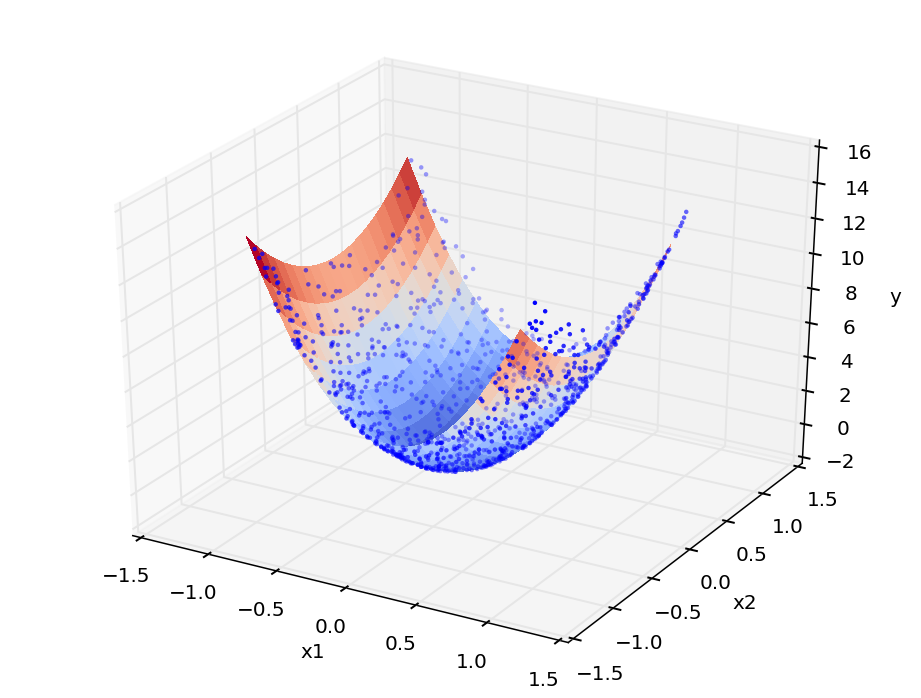

In [11]:
ax = plot_3d(X1, X2, Y, 'surface')
plot_3d(x1s_samp, x2s_samp, ys_samp, style='scatter', ax=ax)

# Gradient descent

In [12]:
from models import QuadraticModel

In [13]:
models = []
methods = [
    'bgd',
    'sgd',
    'momentum',
    'nesterov',
    'adagrad',
    'adadelta',
    'rmsprop',
    'adam',
    'adamax',
    'nadam',
]
n_epochs = [500] + [2] * (len(methods) - 1)

In [14]:
for met, epo in zip(methods, n_epochs):
    mod = QuadraticModel(learning_rate=0.1, n_epochs=epo)
    mod.fit(xs_samp, ys_samp, method=met)
    models.append(mod)

100%|██████████| 2/2 [00:00<00:00, 24.44it/s]


QuadraticModel(w=[ 9.92982102  4.06655956], learning_rate=0.1, n_epochs=500
QuadraticModel(w=[ 9.99999977  4.00000018], learning_rate=0.1, n_epochs=2
QuadraticModel(w=[10.  4.], learning_rate=0.1, n_epochs=2
QuadraticModel(w=[ 10.   4.], learning_rate=0.1, n_epochs=2
QuadraticModel(w=[ 4.24652485  5.13537251], learning_rate=0.1, n_epochs=2
QuadraticModel(w=[ 10.   4.], learning_rate=0.1, n_epochs=2
QuadraticModel(w=[ 10.08315513   3.98361965], learning_rate=0.1, n_epochs=2
QuadraticModel(w=[10.  4.], learning_rate=0.1, n_epochs=2
QuadraticModel(w=[ 9.99044676  4.00817634], learning_rate=0.1, n_epochs=2
QuadraticModel(w=[10.  4.], learning_rate=0.1, n_epochs=2


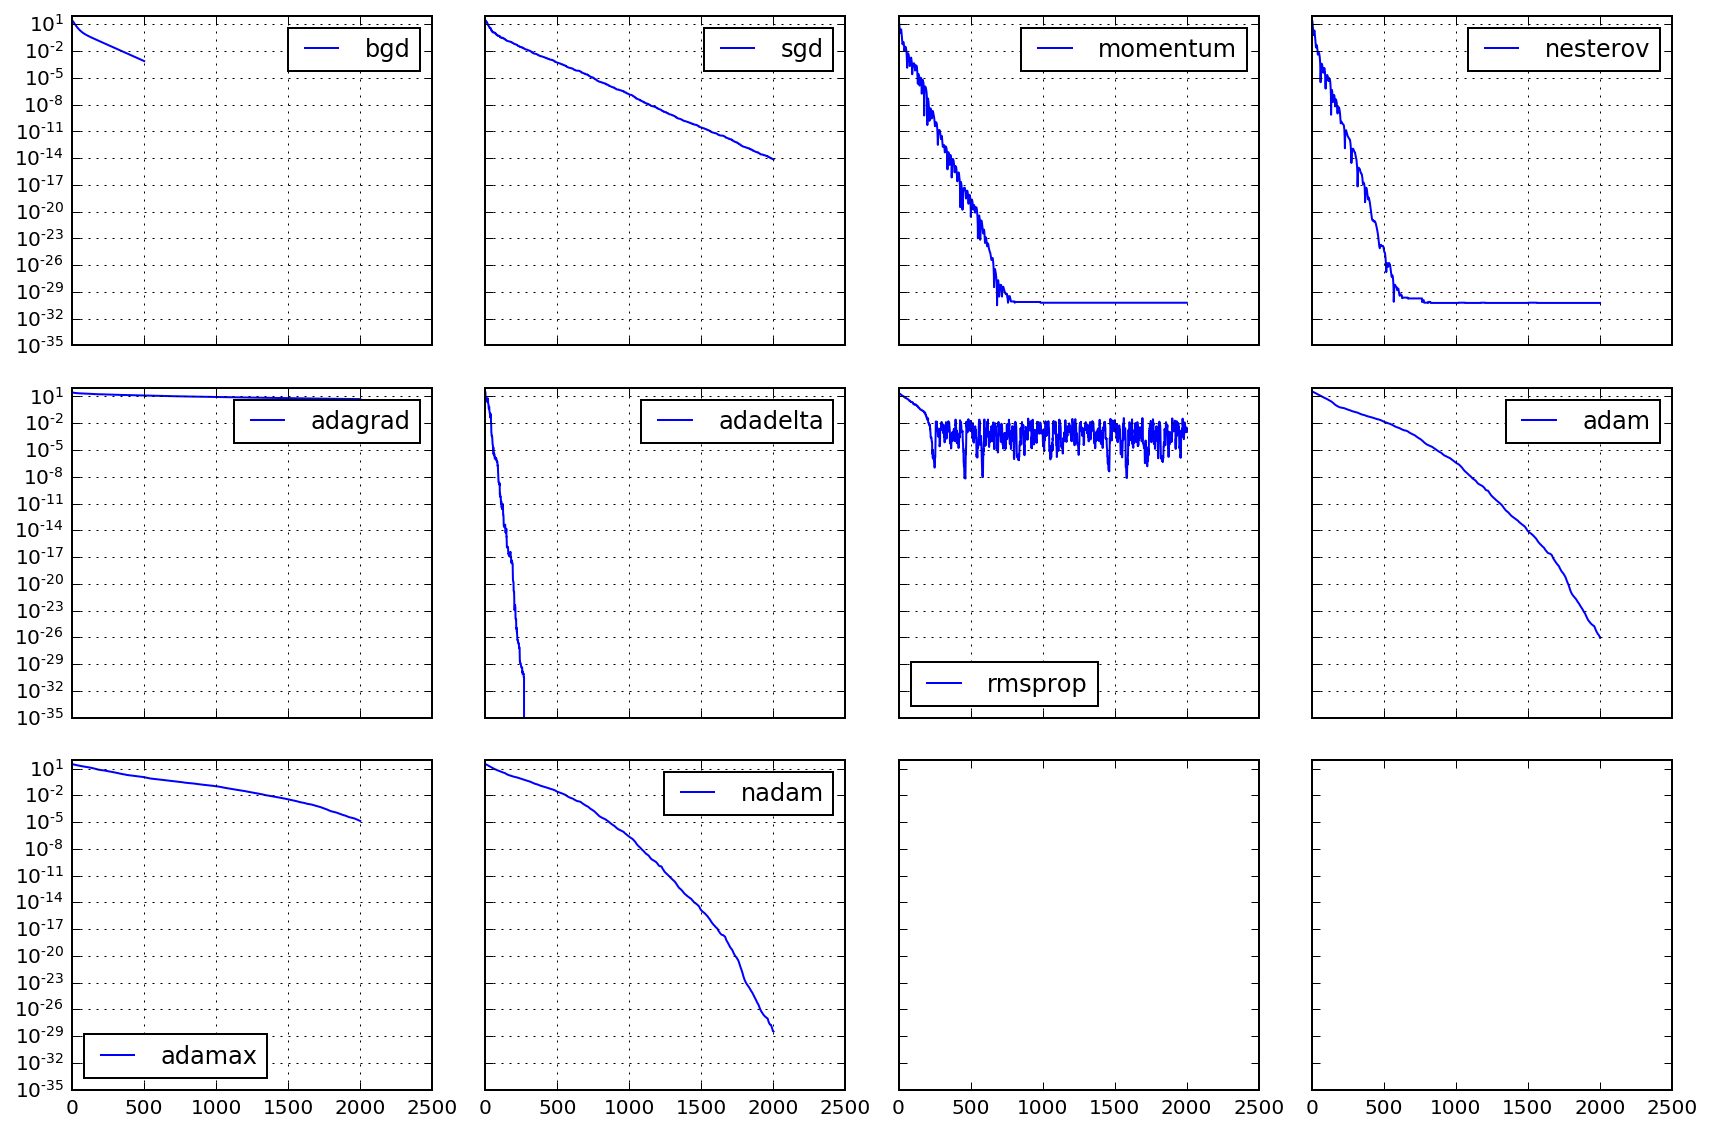

In [15]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.ravel()

for k, (m, t) in enumerate(list(zip(models, methods))):
    print(m)
    ax = axes[k]
    ax.plot(np.arange(len(m.history['loss'])), m.history['loss'], label=t, lw=1, )
    # ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    ax.legend(loc='best')
    ax.grid()
    
#     ax.set_xlim(0, 600)
    ax.set_ylim(1e-35, 100)
    ax.set_yscale('log')
plt.tight_layout()

This is the loss w.s.t the whole dataset, not just the batch (batchsize=1), which would have been much noiser. As seen, momentum (with or without Nesterov) performs much better.

# Plot loss

In [16]:
w1_samp = np.arange(-ref_w[0] - 0, ref_w[0] + 5, 1)
w2_samp = np.arange(-ref_w[1] - 3, ref_w[1] + 10, 1)

In [17]:
W1, W2 = np.meshgrid(w1_samp, w2_samp)

In [18]:
J = np.zeros(W1.shape)

In [19]:
for i, _w1 in enumerate(w1_samp):
    for j, _w2 in enumerate(w2_samp):
        J[j][i] = np.mean((true_func_wraper(x1s_samp, x2s_samp, [_w1, _w2]) - ys_samp) ** 2)

#### Scatter version

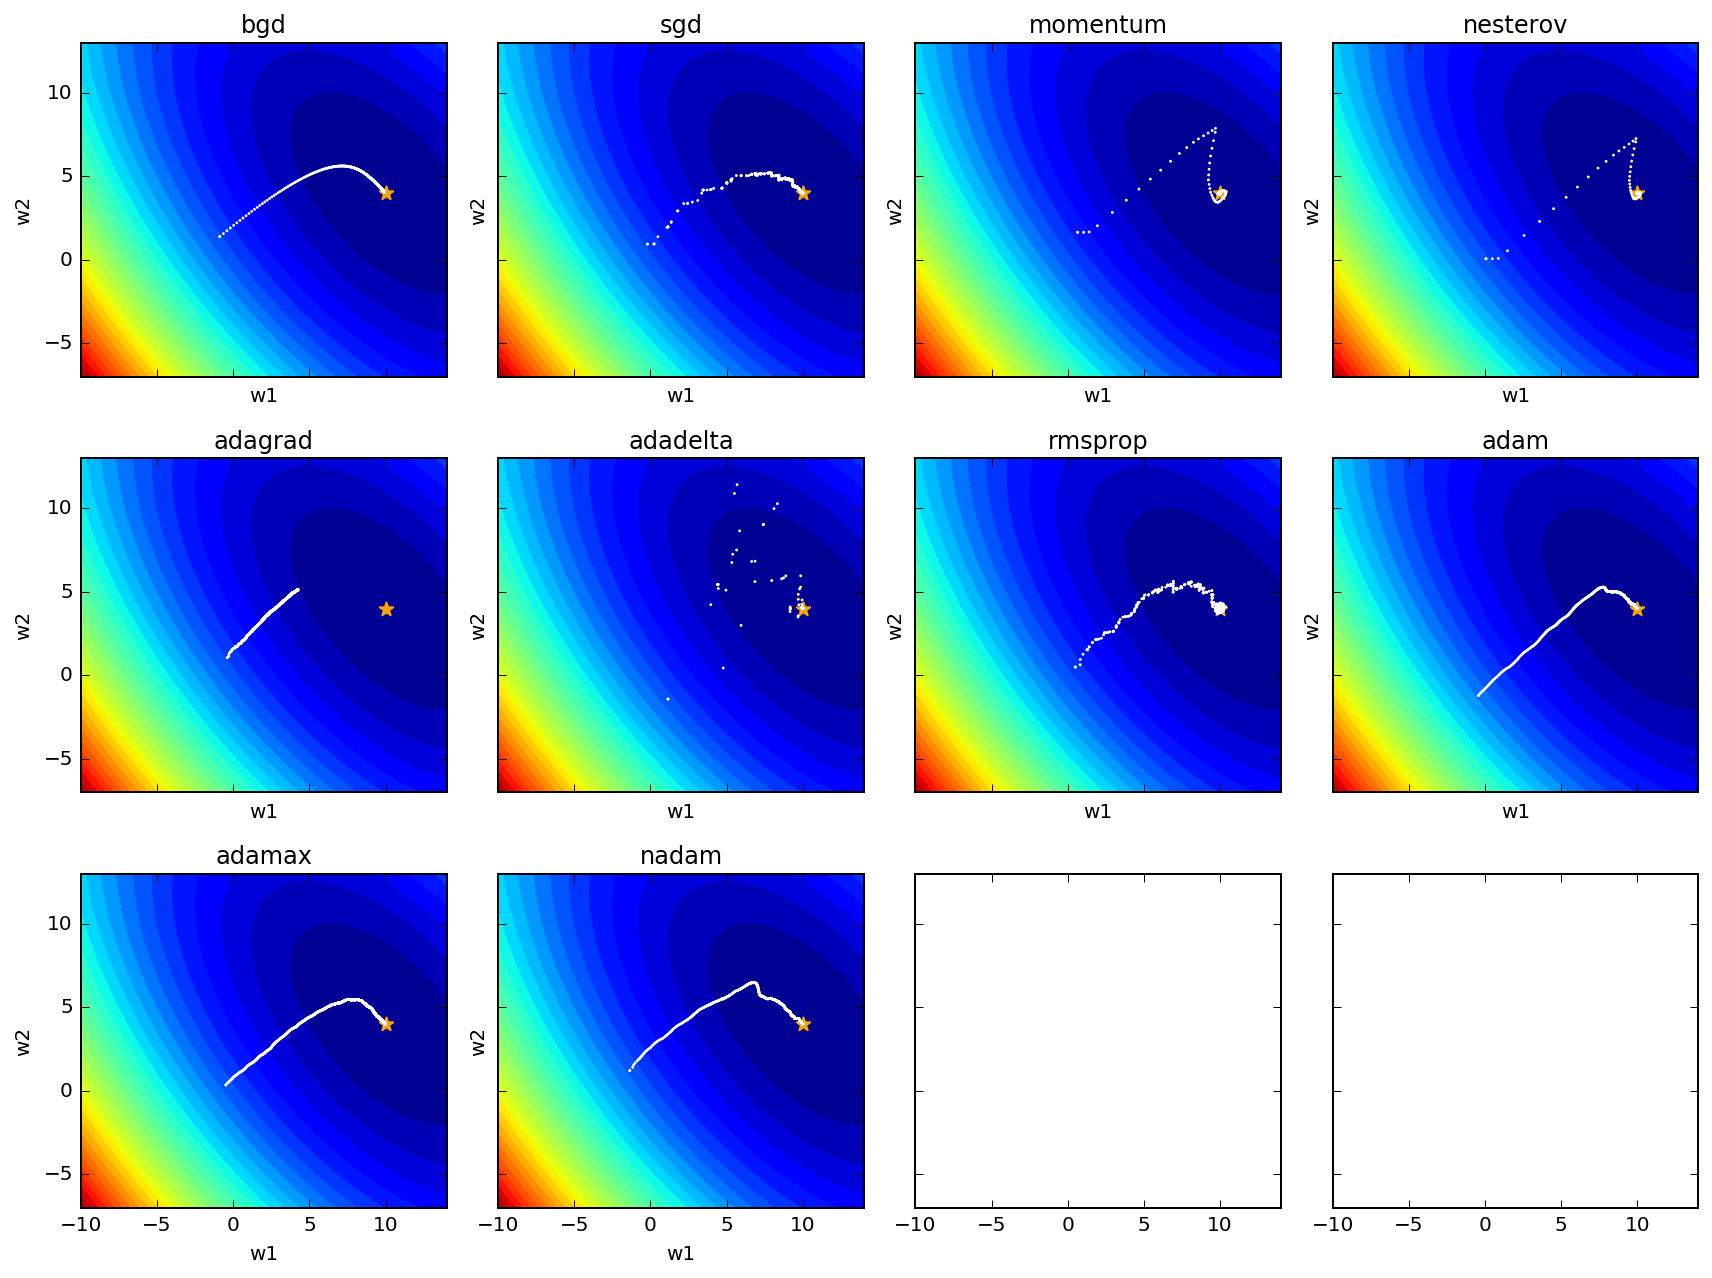

In [20]:
fig, axes = plt.subplots(3, 4, figsize=(12, 9), sharex=True, sharey=True)
axes = axes.ravel()

# plt.colorbar(ctf)
for k, (mod, met) in enumerate(list(zip(models, methods))):
    ax = axes[k]
    ctf = ax.contourf(W1, W2, J, 30)
    ax.scatter(*ref_w, marker='*', color='orange', s=50)
    ax.scatter(mod.history['w'][:,0], mod.history['w'][:,1], marker='o', s=2, edgecolors='none', color='white')
    ax.set_title(met)
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    
plt.tight_layout()

#### Line version

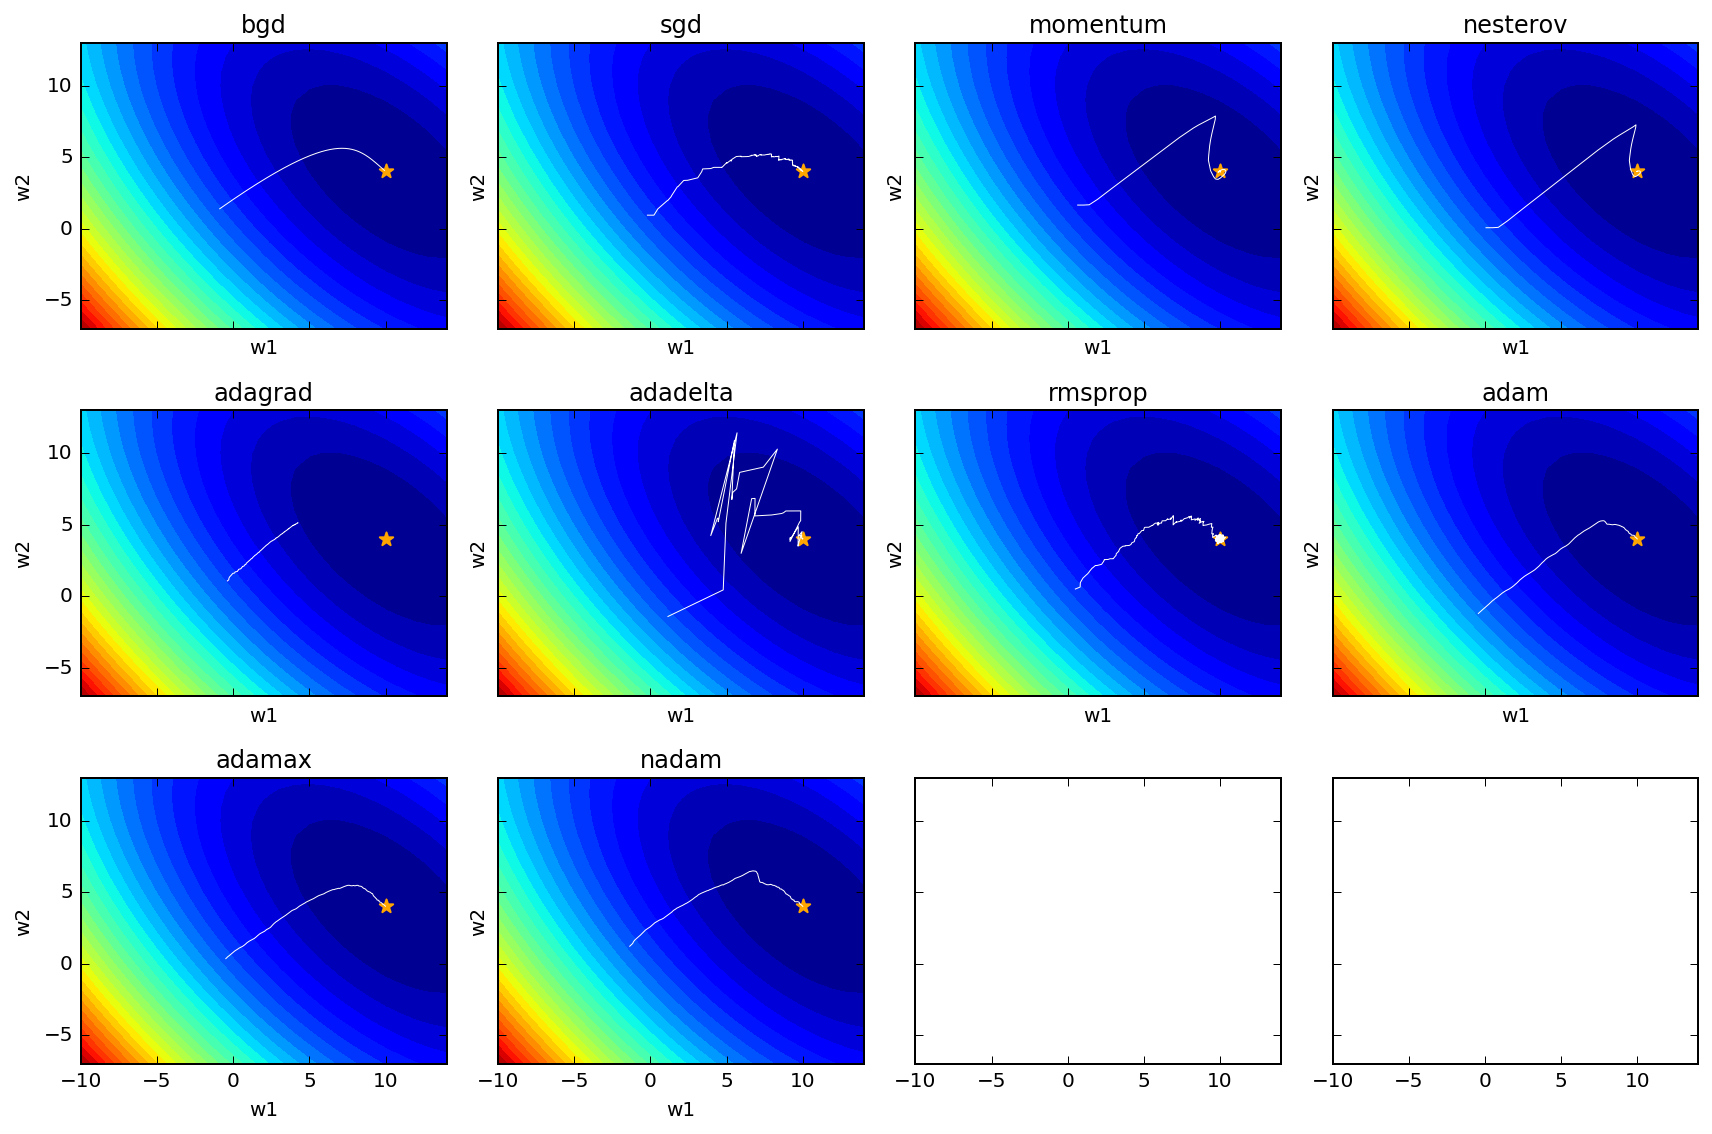

In [21]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.ravel()

# plt.colorbar(ctf)
for k, (mod, met) in enumerate(list(zip(models, methods))):
    ax = axes[k]
    ctf = ax.contourf(W1, W2, J, 30)
    ax.scatter(*ref_w, marker='*', color='orange', s=50)
#     ax.scatter(mod.history['w'][:,0], mod.history['w'][:,1], marker='.', edgecolors='none', color='red')
    ax.plot(mod.history['w'][:,0], mod.history['w'][:,1], color='white', lw=0.5)
    ax.set_title(met)
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
#     ax.set_xlim(5, 15)
#     ax.set_ylim(2, 8)
    
plt.tight_layout()

Comments:

* Batch gradient descent is the most smooth
* Stochastic gradient descent is more jumpy
* Plain momentum and Nesterov accelerated momentum (NAM) overshoot and then correct themselve
* Adagrad gets stuck as $G$ continues to increase adding squared gradients at each time step, effectively keeping reducing the learning rate to become infinitesimally small, thus learning gets halted.
* Adadelta fixed the diminishing problem of Adagrad, resulting in very jumpy trajectories
* RMSprop is quite similar to Adagrad, replacing $RMS[\Delta \theta]_{t-1}$ with $\eta$, but it doesn't seem to be as good as Adadelta based on the above loss function trajectory.
* Adam looks good.
* AdaMax doesn't look as good as Adam based on loss function
* Nadam performs similar to Adam

# Debug

In [69]:
m = models[methods.index('adadelta')]

In [70]:
m.history['loss'][-1]

0.0

In [71]:
# history_eta has only been implemented for Adadelta
df_adadelta_eta = pd.DataFrame(m.history_eta, columns=['eta1', 'eta2'])

Show the different learning rates for different parameters using Adadelta algorithm.

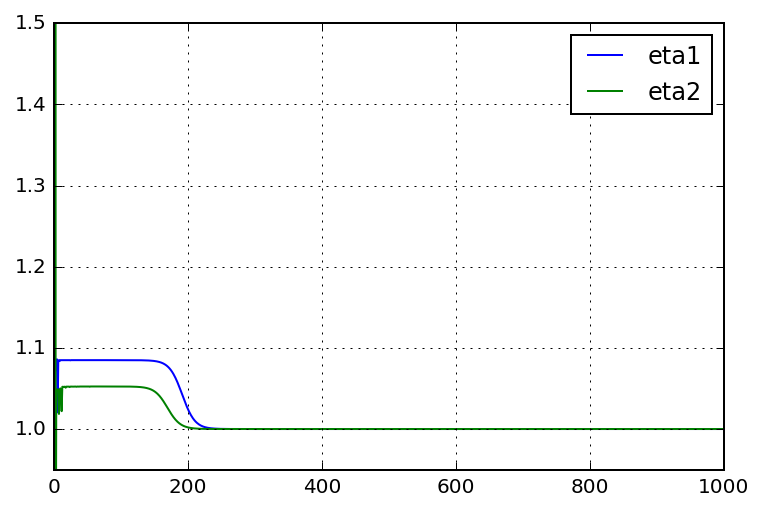

In [73]:
ax = df_adadelta_eta.plot()
# ax.set_xlim(0, 300)
ax.set_ylim(0.95, 1.5)
ax.grid()